# Homework 6

**Before you start:** Read Chapter 10 Logistic Regression and Chapter 11 Neural Networks in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

In [ ]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

## Part 1: Logistic Regression

### Problem 1 - Financial Condition of Banks##

The file **Banks.csv** includes data on a sample of 20 banks. 

The “Financial Condition” column records the judgment of an expert on the financial condition of each bank. This response variable takes one of two possible values—weak or strong—according to the financial condition of the bank. 

The predictors are two ratios used in the financial analysis of banks: TotLns&Lses/Assets is the ratio of total loans and leases to total assets and TotExp/Assets is the ratio of total expenses to total assets. 

The target is to classify the financial condition of a new bank using the two ratios.


In [1]:
# Load the required packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [69]:
# Import the dataset
data=pd.read_csv("D:\Orders\Files\Banks.csv")
data.head(5)

,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69



**TODO 1**

Run a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial measures provided. 

In [70]:
y=data['Financial Condition']
X=data.pop('Financial Condition')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [72]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.346574
         Iterations: 35
                                 Results: Logit
Model:                    Logit                    Pseudo R-squared:      0.500  
Dependent Variable:       Financial Condition      AIC:                   15.8629
Date:                     2022-12-06 04:30         BIC:                   16.8587
No. Observations:         20                       Log-Likelihood:        -6.9315
Df Model:                 0                        LL-Null:               -13.863
Df Residuals:             19                       LLR p-value:           nan    
Converged:                0.0000                   Scale:                 1.0000 
No. Iterations:           35.0000                                                
---------------------------------------------------------------------------------
                     Coef.    Std.Err.     z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------

C:\Users\Ritchie Programmer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



**TODO 2**

Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats:

a. The logit as a function of the predictors

b. The odds as a function of the predictors

c. The probability as a function of the predictors



**TODO 3**

Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11. 

From your logistic regression model, estimate the following four quantities for this bank: 

the logit, the odds, the probability of being financially weak, and the classification of the bank (use cutoff = 0.5).

**TODO 4**

We use a cutoff value of 0.5 to classify a record based on propensity. 

Instead, if we want to classify the record using the odds or logit, what value should we take as a cutoff?

**TODO 5**

When a bank with in poor financial condition is misclassified as financially strong, the misclassification cost is much higher than a financially strong bank misclassified as weak. 

To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

### Problem 2 - Identifying Good System Administrators##

A management consultant is studying the roles played by experience and training in a system administrator’s ability to complete a set of tasks in a specified amount of time. In particular, the consultant is interested in discriminating between administrators who are able to complete given tasks within a specified time and those who are not. 

Data are collected on the performance of 75 randomly selected administrators. They are stored in the file **SystemAdministrators.csv**.

The variable Experience measures months of full-time system administrator experience, while Training measures the number of relevant training credits. The outcome variable Completed is either Yes or No, according to whether or not the administrator completed the tasks.


In [34]:
# Import the dataset
data2=pd.read_csv("D:\Orders\Files\SystemAdministrators.csv")
data2.head(5)

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes


In [35]:
data2['Completed task'].replace(['Yes', 'No '],
                        [1, 0], inplace=True)
data2

,Experience,Training,Completed task
0,10.9,4,1
1,9.9,4,1
2,10.4,6,1
3,13.7,6,1
4,9.4,8,1
...,...,...,...
70,5.6,4,No
71,5.9,8,No
72,6.4,6,No
73,3.8,4,No



**TODO 1**

Create a scatter plot of Experience vs. Training using color or symbol to distinguish the administrators' task completion statues. 

Which predictor(s) appear(s) potentially useful for the classifying task?

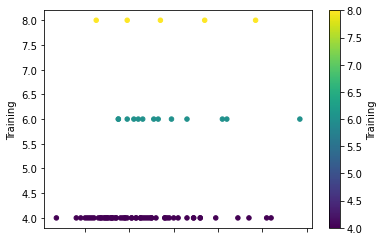

In [36]:
ax2 = data2.plot.scatter(x='Experience',
                       y='Training',
                       c='Training',
                       colormap='viridis')

**TODO 2**

Run a logistic regression model with both predictors using the entire dataset as training data. Among those who completed the task, what is the percentage of administrators incorrectly classified as failing to complete the task?

In [37]:
y=data2['Completed task']
X=data2.pop('Completed task')

In [83]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

In [87]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.346574
         Iterations: 35
                                 Results: Logit
Model:                    Logit                    Pseudo R-squared:      0.500  
Dependent Variable:       Financial Condition      AIC:                   15.8629
Date:                     2022-12-06 04:44         BIC:                   16.8587
No. Observations:         20                       Log-Likelihood:        -6.9315
Df Model:                 0                        LL-Null:               -13.863
Df Residuals:             19                       LLR p-value:           nan    
Converged:                0.0000                   Scale:                 1.0000 
No. Iterations:           35.0000                                                
---------------------------------------------------------------------------------
                     Coef.    Std.Err.     z    P>|z|      [0.025       0.975]   
------------------------------------------------------------------

C:\Users\Ritchie Programmer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y)
print(confusion_matrix)

[[10  0]
 [ 0 10]]


In [ ]:
There were 10 incorrect predictions

**TODO 3**

To decrease the percentage in TODO 2, should we increase or decrease the cutoff probability?

increasing the cut-off leads to more False Negatives and decreasing the cut-off leads to more False Positives.We should therefore decrease the cut off probability

**TODO 4**

How much experience must be accumulated by a administrator with 4 years of training before his or her estimated probability of completing the task exceeds 0.5?

## Part 2: Neural Network

### Problem 3 - Car Sales##

Consider the data on used cars (**ToyotaCorolla.csv**) with 1436 records and details on 38 attributes, including Price, Age, KM, HP, and other specifications. The goal is to predict the price of a used Toyota Corolla based on its specifications.

In [8]:
# Import the dataset
df2=pd.read_csv("D:\Orders\Files\ToyotaCorolla.csv",encoding='cp1252')
df2.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [10]:
df2.pop('Model')


0           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
1           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
2           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
3           TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
4             TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors
                              ...                        
1431           TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors
1432    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1433    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1434    TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...
1435          TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors
Name: Model, Length: 1436, dtype: object

In [ ]:
X = train_val_df[['RHOB', 'GR', 'NPHI', 'PEF']]
y = train_val_df['DT']

# Split the data into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#Scikit Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

**TODO 1**

Fit a neural network model with the following specifications:

*   Use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player,Powered_Windows, Sport_Model, and Tow_Bar
*   Partition the data into 80% training and 20% validation
*   Scale the numerical predictors; convert categorical predictors to dummies
*   The neural network should have one single hidden layer with two nodes

Present the model summary and performance on the training and validation sets.


In [ ]:
model = MLPRegressor(hidden_layer_sizes=(64, 64,64), 
                     activation="relu" ,
                     random_state=42, max_iter=2000)

In [ ]:
model.fit(X_train, y_train)

#Predict on the validation data
y_pred = model.predict(X_val)
mae = metrics.mean_absolute_error(y_val, y_pred)

mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

r2 = metrics.r2_score(y_val, y_pred)

print(f"""
MAE: \t{mae:.2f}
RMSE: \t{rmse:.2f}
r2: \t{r2:.2f}
""")

**TODO 2**

Repeat the process, changing the number of hidden layers and nodes to {single layer with five nodes}, {two layers, five nodes in each layer}.

Comment on the performance of the three models above.

In [ ]:
Training Wells
training_wells = ['15/9-F-11 A', '15/9-F-1 A']

# Test Well
test_well = ['15/9-F-1 B']

# Create training and testing dataframes
train_val_df = df[df['WELL'].isin(training_wells)].copy()
test_df = df[df['WELL'].isin(test_well)].copy()
y_pred = model.predict(X_val)
mae = metrics.mean_absolute_error(y_val, y_pred)

mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

r2 = metrics.r2_score(y_val, y_pred)

print(f"""
MAE: \t{mae:.2f}
RMSE: \t{rmse:.2f}
r2: \t{r2:.2f}
""")